In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})
plt.rcParams['axes.unicode_minus'] = False

字体设置

In [2]:
data = pd.read_csv("daxin.csv",index_col = 0)

## 收益率分析

Text(0.02, 2, '峰值=1.5%')

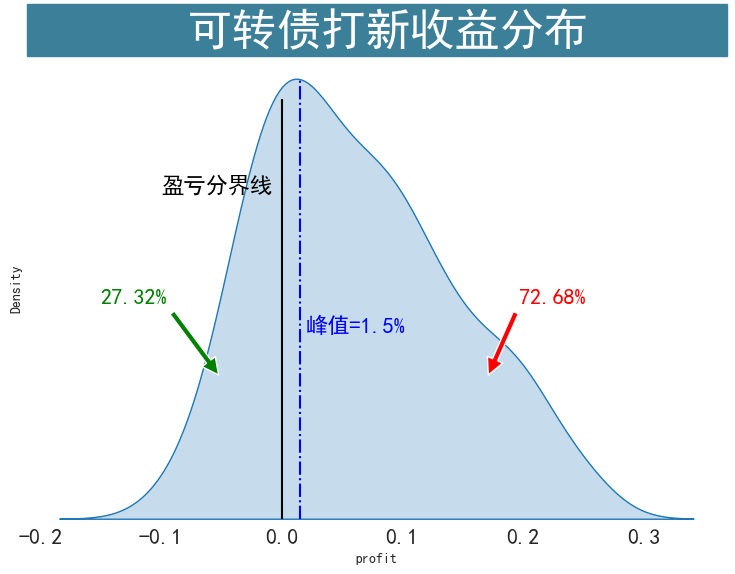

In [3]:
lose_size = round((data.profit<=0).mean(),4)*100                  # data.profit<=0找出<0范围profit的平均值
win_size = round((data.profit>0).mean(),4)*100
median = data.profit.median()
fig,ax = plt.subplots(figsize=(9,6))
fig.text(x=0.13, y=0.90, s='       可转债打新收益分布      ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
sns.kdeplot(data.profit,fill=True,legend=False,ax=ax)
plt.vlines(0,0,4.5,colors="black")                           # 第一个参数竖线横坐标位置，第二个是下限，第三个是上限
plt.vlines(0.015,0,4.7,linestyles='dashdot',colors="b")

plt.box(False)
plt.yticks([])   # 没有y轴
plt.tick_params(axis='both', which='major', labelsize=16,bottom=False)   # bottom底部是否有刻度
ax.annotate('{}%'.format(lose_size), (-0.05, 1.5),                      #箭头的点的坐标
            xytext=(0.2,0.5), textcoords='axes fraction',                #文字注释的坐标位置，位置采用分数坐标
            arrowprops=dict(facecolor='g', shrink=0.05),             #shrink控制箭头长度，离注释点一定距离，越小空白区域少
            fontsize=16,color = "g",
            horizontalalignment='right', verticalalignment='top')   # 水平垂直对齐方式
ax.annotate('{}%'.format(win_size), (0.17, 1.5),
            xytext=(0.8,0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.05),
            fontsize=16,color = "r",
            horizontalalignment='right', verticalalignment='top')
ax.annotate('盈亏分界线', (0, 1.5),
            xytext=(-0.1,3.5), textcoords='data',       # textcoords指定注释采用的是图画坐标还是数据坐标
            fontsize=16,color = "black",)
ax.annotate('峰值=1.5%', (0.02, 1.5),
            xytext=(0.02,2), textcoords='data',
            fontsize=16,color = "b",)

## 公司市值与收益率关系

Text(0, 0.5, '收益率')

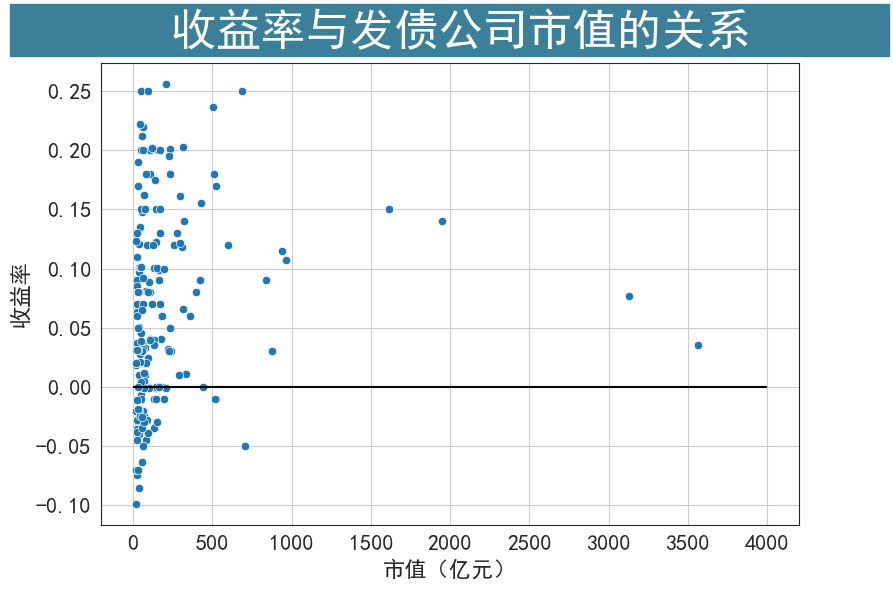

In [4]:
fig,ax = plt.subplots(figsize=(9,6))
fig.text(x=0.03, y=0.91, s='       收益率与发债公司市值的关系      ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
sns.scatterplot(x = "total_mv", y ="profit",data=data)
plt.hlines(0,xmin=-1,xmax=4000,colors="black")
plt.tick_params(axis='both', which='major', labelsize=16,bottom=False)
plt.grid()
plt.xlabel("市值（亿元）",fontdict={"size":16})
plt.ylabel("收益率",fontdict={"size":16})

Text(0, 0.5, '收益率')

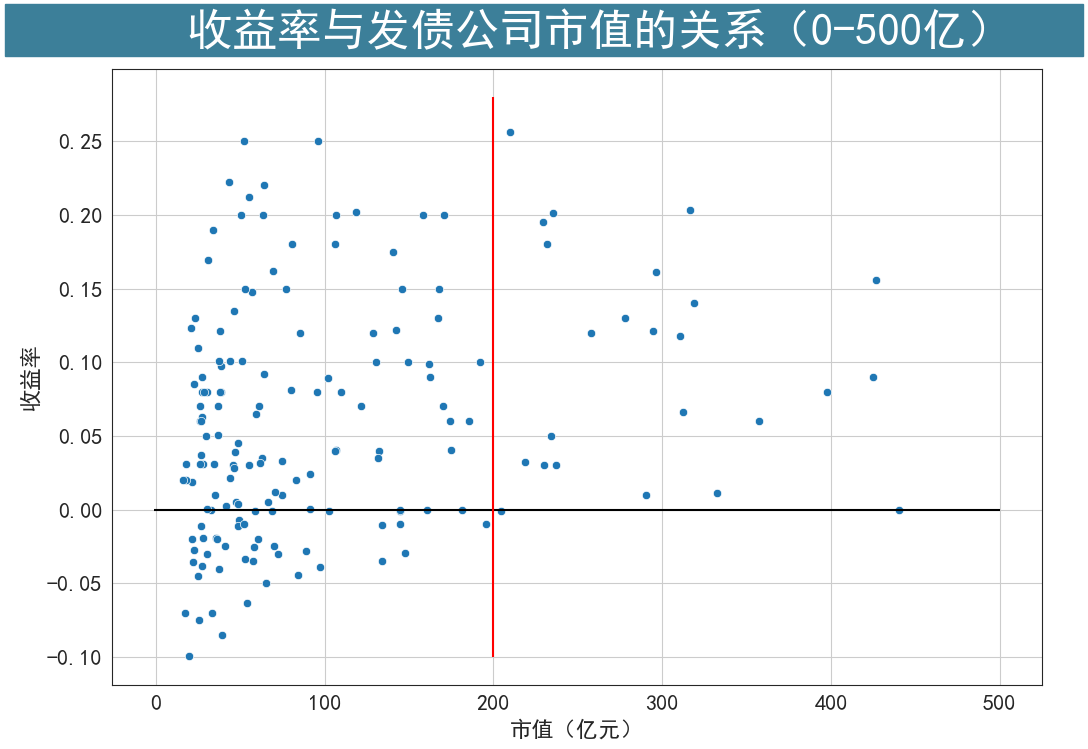

In [5]:
fig,ax = plt.subplots(figsize=(12,8))
fig.text(x=0.04, y=0.91, s='        收益率与发债公司市值的关系（0-500亿）   ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
sns.scatterplot(x = "total_mv", y ="profit",data=data[data["total_mv"]<=500])
plt.hlines(0,xmin=-1,xmax=500,colors="black")
plt.vlines(200,ymin=-0.1,ymax=0.28,colors="r")
plt.tick_params(axis='both', which='major', labelsize=16,bottom=False)
plt.grid()
plt.xlabel("市值（亿元）",fontdict={"size":16})
plt.ylabel("收益率",fontdict={"size":16})

## 板块与收益率的关系

Text(55.597222222222214, 0.5, '所处板块')

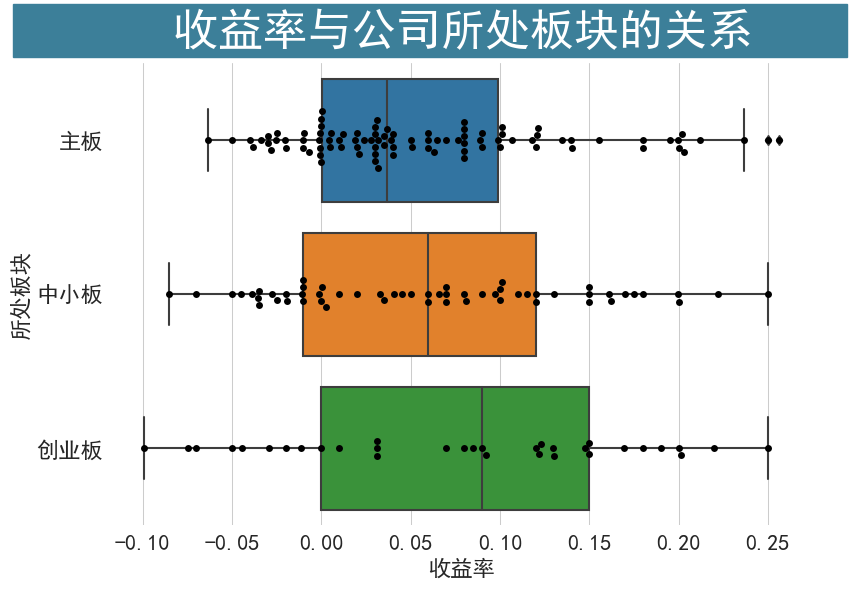

In [6]:
fig,ax = plt.subplots(figsize=(9,6))
fig.text(x=0.02, y=0.91, s='       收益率与公司所处板块的关系    ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
sns.boxplot(x = "profit",y = "market",data=data,order=["主板","中小板","创业板"])    # 箱线图
sns.swarmplot(x = "profit",y = "market",data=data,order=["主板","中小板","创业板"],color="black")  # 散点分布图
plt.tick_params(axis="both",labelsize=16)
ax.xaxis.grid(which='both', linewidth=0.75)
plt.box(False)
plt.xlabel('收益率', fontsize=16)
plt.ylabel('所处板块', fontsize=16)

## 行业与收益率的关系

In [7]:
industry = [industry for industry,df in list(data.groupby("industry")) if len(df)>=5]   # 筛选出industry多于5的组名
industry_df = data[data.industry.isin(industry)]

Text(0, 0.5, '')

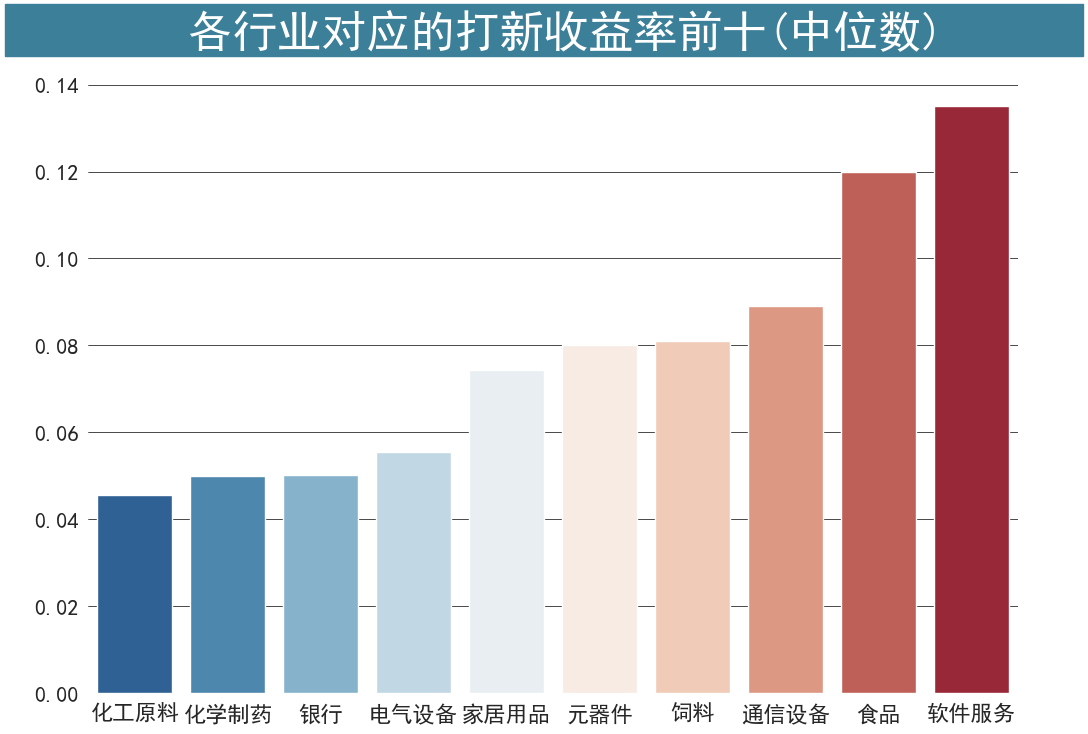

In [8]:
import numpy as np
fig,ax = plt.subplots(figsize=(12,8))
fig.text(x=0.06, y=0.92, s='        各行业对应的打新收益率前十(中位数)      ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
industry_order = industry_df.groupby("industry")["profit"].median()\
               .sort_values()\
               .index.tolist()[2:]
sns.barplot(x="industry", y="profit", order=industry_order, data=industry_df, estimator = np.median,errorbar = None,palette="RdBu_r")

plt.tick_params(axis="both",labelsize=16,)
ax.yaxis.grid(which='both', linewidth=0.5, color='black')
plt.box(False)
plt.xlabel('')
plt.ylabel('')

## 时间效应

In [9]:
industry_df

,stk_code,list_date,industry,market,total_mv,profit,year,month,Unnamed: 9,Unnamed: 10
ts_code,,,,,,,,,,
128024.SZ,002142.SZ,12/01/2018,银行,中小板,938.407450,0.1150,2018,1,NaN,NaN
123003.SZ,300433.SZ,17/01/2018,元器件,创业板,708.786643,-0.0499,2018,1,NaN,NaN
128027.SZ,002815.SZ,22/01/2018,元器件,中小板,121.770000,0.0700,2018,1,NaN,NaN
113503.SH,603738.SH,02/01/2018,元器件,主板,27.330132,0.0800,2018,1,NaN,NaN
123004.SZ,300197.SZ,26/01/2018,环境保护,创业板,170.201205,0.0700,2018,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
123033.SZ,300748.SZ,25/11/2019,元器件,创业板,166.858002,0.1300,2019,11,NaN,NaN
123034.SZ,300265.SZ,28/11/2019,电气设备,创业板,26.088750,0.0310,2019,11,NaN,NaN
113549.SH,603861.SH,11/12/2019,电气设备,主板,38.052561,0.0800,2019,12,NaN,NaN


In [10]:
heatmap_df = data.groupby("month")["profit"].describe().sort_index().drop(columns = "count") # describe()详细信息

In [11]:
heatmap_df

,mean,std,min,25%,50%,75%,max
month,,,,,,,
1,0.057034,0.071953,-0.04990,0.001875,0.03765,0.08750,0.25000
2,0.068483,0.055029,-0.01010,0.042750,0.06150,0.10650,0.14000
3,0.113747,0.068556,-0.00120,0.076500,0.11810,0.15000,0.22220
4,0.103216,0.083288,-0.03500,0.045450,0.09000,0.16000,0.25600
5,0.014708,0.071331,-0.05000,-0.026475,-0.00605,0.03500,0.19989
6,0.000550,0.079578,-0.08530,-0.046450,-0.00675,0.04025,0.10100
7,0.050289,0.074501,-0.04000,-0.009250,0.02560,0.11300,0.20200
8,-0.024560,0.038839,-0.09900,-0.054250,-0.01950,0.00210,0.03880
9,0.089345,0.103328,-0.07000,0.003095,0.11000,0.16535,0.23640


(Text(0.5, 60.7222222222222, ''), Text(97.72222222222221, 0.5, ''))

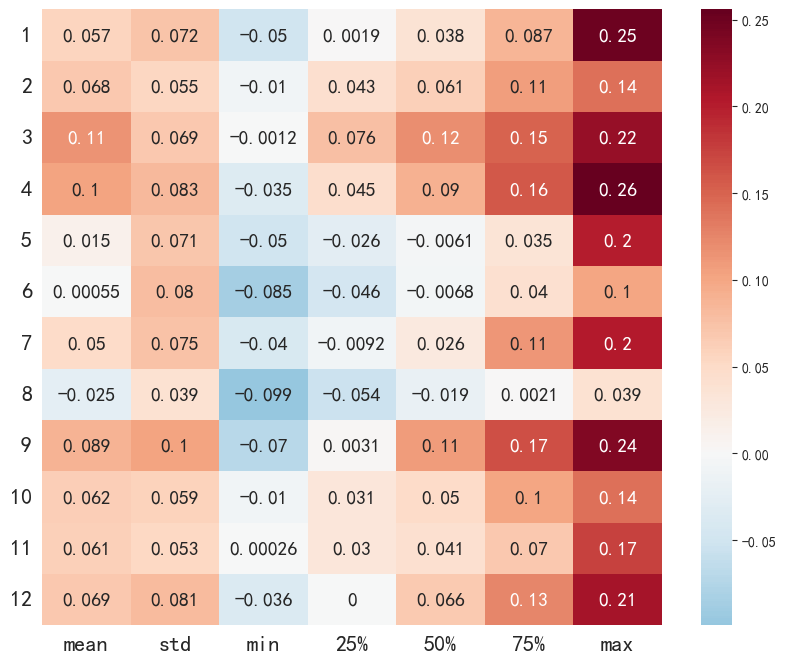

In [12]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(heatmap_df,cmap="RdBu_r",center=0,annot=True,annot_kws={'fontsize':14})
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16,labelrotation=0)
plt.xlabel(""),plt.ylabel("")